# Yearly model

In [1]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Pre-process data

In [2]:
# data = pd.read_csv('data.csv',sep=";")
# data = pd.read_csv('data(NCG).csv',sep=";")
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(PEG).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(VTP).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(ZEE).csv',sep=";")) 
# data = data.append(pd.read_csv('data.csv',sep=";")) 
# data = data.append(pd.read_csv('data(PSV).csv',sep=";"))               
# data = data.append(pd.read_csv('data.csv',sep=";")) 

# data = pd.read_csv('data(NCG).csv',sep=";")
# data = pd.read_csv('data(PEG).csv',sep=";")
# data = pd.read_csv('data(VTP).csv',sep=";") 
# data = pd.read_csv('data(ZEE).csv',sep=";") 
# data = pd.read_csv('data(PSV).csv',sep=";")               
data = pd.read_csv('data.csv',sep=";") 
data = data.dropna()
# display(data)
# print(data['% FULL'].mean())

scaler1 = MinMaxScaler(feature_range=(-1, 1))
data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
scaler3 = MinMaxScaler(feature_range=(-1, 1))
data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
scaler4 = MinMaxScaler(feature_range=(-1, 1))
data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
scaler5 = MinMaxScaler(feature_range=(-1, 1))
data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
scaler6 = MinMaxScaler(feature_range=(-1, 1))
data['JKM (Eur/mmbtu)']=scaler6.fit_transform(data['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
scaler7 = MinMaxScaler(feature_range=(-1, 1))
data['Endex (eur/Mwh)']=scaler7.fit_transform(data['Endex (eur/Mwh)'].values.reshape(-1, 1))
# scaler8 = MinMaxScaler(feature_range=(-1, 1))
# data['AVG_TEMP']=scaler8.fit_transform(data['AVG_TEMP'].values.reshape(-1, 1))


data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):int(data.shape[0]*0.95)]
data_validate = data.iloc[int(1+data.shape[0]*0.95):]
display(data_train)
data_train = shuffle(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)

X_validate= torch.Tensor(data_validate[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']].astype(np.float32).values)
y_validate= torch.tensor(data_validate['TTF (eur/Mwh)'].astype(np.float32).values)


/home/sweerts/anaconda3/envs/trading/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,date,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,TTF (eur/Mwh)
0,4/01/2016,-1.000000,0.382453,-0.646412,-0.145412,-0.874372,-0.654026,-0.590147,3.5,14.68
1,5/01/2016,-1.000000,0.366899,-0.665730,-0.140441,-0.889447,-0.658287,-0.588491,2.0,14.70
2,6/01/2016,-1.000000,0.352708,-0.751741,-0.151809,-0.862647,-0.679591,-0.583523,0.5,15.18
3,7/01/2016,-1.000000,0.337700,-0.787722,-0.187518,-0.842546,-0.696634,-0.558270,-2.5,15.38
4,8/01/2016,-1.000000,0.324328,-0.794534,-0.186657,-0.889447,-0.707712,-0.596771,0.5,14.57
5,11/01/2016,-1.000000,0.293219,-0.860836,-0.174514,-0.902848,-0.732424,-0.606707,7.0,14.48
6,12/01/2016,-1.000000,0.282030,-0.885936,-0.179240,-0.926298,-0.734129,-0.649762,5.0,14.05
7,13/01/2016,-1.000000,0.269205,-0.908342,-0.186736,-0.943049,-0.722199,-0.652660,7.5,14.25
8,14/01/2016,-1.000000,0.253377,-0.880680,-0.189371,-0.948074,-0.735833,-0.676671,6.0,13.82
9,19/01/2016,-1.000000,0.159503,-0.968968,-0.541956,-0.966499,-0.758841,-0.742910,-1.0,13.70


# Neural network

In [3]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, hidden6_size, hidden7_size,hidden8_size, hidden9_size, hidden10_size,hidden11_size,num_classes):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc1 = nn.DataParallel(self.fc1)
#         self.drop1 = nn.Dropout(p=0.5)
#         self.bn1 = nn.BatchNorm1d(hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc2 = nn.DataParallel(self.fc2)
#         self.drop2 = nn.Dropout(p=0.5)
#         self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.fc3 = nn.DataParallel(self.fc3)
#         self.drop3 = nn.Dropout(p=0.5)
#         self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
        self.fc4 = nn.DataParallel(self.fc4)
#         self.drop4 = nn.Dropout(p=0.5)
#         self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
        self.fc5 = nn.DataParallel(self.fc5)
#         self.drop5 = nn.Dropout(p=0.5)
#         self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden5_size, hidden6_size)
        self.fc6 = nn.DataParallel(self.fc6)
#         self.drop6 = nn.Dropout(p=0.5)
#         self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(hidden6_size, hidden7_size)
        self.fc7 = nn.DataParallel(self.fc7)
#         self.drop7 = nn.Dropout(p=0.5)
#         self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(hidden7_size, hidden8_size)
        self.fc8 = nn.DataParallel(self.fc8)
#         self.drop8 = nn.Dropout(p=0.5)
#         self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(hidden8_size, hidden9_size) 
        self.fc9 = nn.DataParallel(self.fc9)
#         self.drop9 = nn.Dropout(p=0.5)
#         self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu9 = nn.ReLU()
        
        self.fc10 = nn.Linear(hidden9_size, hidden10_size) 
        self.fc10 = nn.DataParallel(self.fc10)
#         self.drop10 = nn.Dropout(p=0.5)
#         self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(hidden10_size, hidden11_size)  
        self.fc11 = nn.DataParallel(self.fc11)
#         self.drop11 = nn.Dropout(p=0.5)
#         self.bn11 = nn.BatchNorm1d(hidden11_size)
        self.relu11 = nn.ReLU()
        
        self.fc12 = nn.Linear(hidden11_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
#         out = self.drop1(out)
        out = self.relu1(out)
#         out= self.bn1(out)        
        
        out = self.fc2(out)
#         out = self.drop2(out)
        out = self.relu2(out)
#         out= self.bn2(out)         
        
        out = self.fc3(out)
#         out = self.drop3(out)
        out = self.relu3(out)
#         out= self.bn3(out)        
        
        out = self.fc4(out)
#         out = self.drop4(out)
        out = self.relu4(out)
#         out= self.bn4(out)        
        
        out = self.fc5(out)
#         out = self.drop5(out)
        out = self.relu5(out)
#         out= self.bn5(out)       

        out = self.fc6(out)
#         out = self.drop6(out)
        out = self.relu6(out)
#         out= self.bn6(out)        
        
        out = self.fc7(out)
#         out = self.drop7(out)
        out = self.relu7(out)
#         out= self.bn7(out)         
        
        out = self.fc8(out)
#         out = self.drop8(out)
        out = self.relu8(out)
#         out= self.bn8(out)        
        
        out = self.fc9(out)
#         out = self.drop9(out)
        out = self.relu9(out)
#         out= self.bn9(out)        
        
        out = self.fc10(out)
#         out = self.drop10(out)
        out = self.relu10(out)
#         out= self.bn10(out)  

        out = self.fc11(out)
#         out = self.drop11(out)
        out = self.relu11(out)
#         out= self.bn11(out)  
        
        out = self.fc12(out)
        return out

# Train it!

In [ ]:
import time
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device="cpu"
num_nodes = 1280
net = Net(7,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
net.train()
X_train = X_train.float().to(device)
y_train = y_train.float().to(device)
X_test = X_test.float().to(device)
y_test = y_test.float().to(device)
X_validate = X_validate.float().to(device)
y_validate = y_validate.float().to(device)


try:
    net.load_state_dict(torch.load('yearly_model_all.pth'))   
except:
    print("can't load model")
learning_rate = 0.00000001
# learning_rate = 0.00000000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []
loss_validate_arr = []


prev_loss = 100000000
curr_loss = 999
epoch = 0

# for epoch in range(2500):
while prev_loss >= curr_loss:
    
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)
    out_validate = net(X_validate)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train.data)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1)).data
    loss_test_arr.append(loss_test)
    loss_validate = F.mse_loss(out_validate.view(1, -1), y_validate.float().view(1, -1)).data
    loss_validate_arr.append(loss_validate)
#     prev_loss = curr_loss
#     curr_loss = loss_test

    epoch = epoch + 1
    if epoch % 1000 == 1:
        print(epoch, loss_test,loss_train,loss_validate)
        torch.save(net.state_dict(),'yearly_model_all.pth')
        prev_loss = curr_loss
        curr_loss = loss_test
    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    
#     torch.nn.utils.clip_grad_norm_(net.parameters(), 0.000001)
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.01)     

    opt.step()

torch.save(net.state_dict(),'yearly_model_all.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[200:])), loss_train_arr[200:],label="train")
plt.plot(np.arange(len(loss_test_arr[200:])), loss_test_arr[200:],label="test")
plt.plot(np.arange(len(loss_validate_arr[200:])), loss_validate_arr[200:],label="validate")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

# Use it!

,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward
0,6,63.171375,59.773557,4.425,56.65,25.53,40.29,14.94,12.162
1,7,73.842460,58.931925,4.726,58.25,25.55,40.94,18.15,12.176
2,8,85.048952,57.859302,5.331,59.80,25.56,45.35,17.86,12.591
3,9,93.652625,56.997890,6.085,61.50,25.59,52.33,16.03,13.471
4,10,98.258629,56.236812,6.789,62.90,25.67,53.96,12.27,16.157
5,11,96.609792,55.124951,7.069,63.75,25.72,54.66,8.69,19.247
6,12,85.623145,54.103068,7.011,64.60,25.77,55.85,6.78,20.017
7,1,72.384597,53.195897,6.339,65.65,25.83,56.72,4.07,20.086
8,2,56.220345,53.013606,5.825,66.40,25.92,55.27,4.15,20.061
9,3,45.418589,52.831314,5.614,66.40,26.15,49.81,5.92,19.766


,month,% FULL,Brent (eur/bbl),JKM (Eur/mmbtu),Coal (eur/t),CO2 (eur/t),Endex (eur/Mwh),AVG_TEMP,current TTF_forward,predicted TTF,market premium
0,6,63.171375,59.773557,4.425,56.65,25.53,40.29,14.94,12.162,15.248895,-3.086895
1,7,73.842460,58.931925,4.726,58.25,25.55,40.94,18.15,12.176,15.039165,-2.863165
2,8,85.048952,57.859302,5.331,59.80,25.56,45.35,17.86,12.591,15.660429,-3.069429
3,9,93.652625,56.997890,6.085,61.50,25.59,52.33,16.03,13.471,17.390106,-3.919106
4,10,98.258629,56.236812,6.789,62.90,25.67,53.96,12.27,16.157,18.783403,-2.626403
5,11,96.609792,55.124951,7.069,63.75,25.72,54.66,8.69,19.247,19.470490,-0.223490
6,12,85.623145,54.103068,7.011,64.60,25.77,55.85,6.78,20.017,19.610426,0.406574
7,1,72.384597,53.195897,6.339,65.65,25.83,56.72,4.07,20.086,18.480600,1.605400
8,2,56.220345,53.013606,5.825,66.40,25.92,55.27,4.15,20.061,18.168762,1.892238
9,3,45.418589,52.831314,5.614,66.40,26.15,49.81,5.92,19.766,17.844435,1.921565


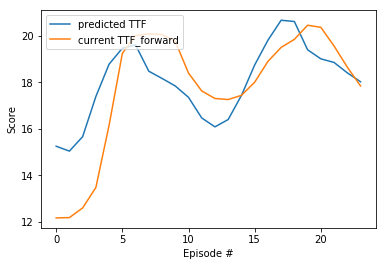

In [4]:
cases = pd.read_csv('Cases.csv',sep=";")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
display(cases)
num_nodes = 1280
net = Net(7,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,num_nodes,1).to(torch.device(device))  
net.load_state_dict(torch.load('yearly_model_all.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)','Endex (eur/Mwh)']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['JKM (Eur/mmbtu)'] = [cases['JKM (Eur/mmbtu)'].iloc[i]]
    X_use['Endex (eur/Mwh)'] = [cases['Endex (eur/Mwh)'].iloc[i]]
#     X_use['AVG_TEMP'] = [cases['AVG_TEMP'].iloc[i]]

    X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
    X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
    X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
    X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
    X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
    X_use['JKM (Eur/mmbtu)'] = scaler6.transform(X_use['JKM (Eur/mmbtu)'].values.reshape(-1, 1))
    X_use['Endex (eur/Mwh)'] = scaler7.transform(X_use['Endex (eur/Mwh)'].values.reshape(-1, 1))
#     X_use['AVG_TEMP'] = scaler8.transform(X_use['AVG_TEMP'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    X_use = X_use.float().to(device) 
    out = net(X_use).data
    out = out.cpu().data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()